### Wstęp do Uczenia Maszynowego 
##### Laboratorium 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

sns.set(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

### Zadanie 5
a) Dopasuj model regresji logistycznej do danych `SAheart.data`.

b) Oblicz prawdopodobieństw przynależności do klasy 1 dla zbioru testowego:

  - metodą `decision_function` oraz odwrotnością funkcji logitowej
    
  - metodą `predict_proba`

c) Dokonaj predykcji dla obserwacji o wartości `sbp = 127`, `age = 30`, `alcohol = 0`, `obesity = 25`, `typea = 49`, `famhist = 'Present'`, `tobbaco = 0`, `ldl = 4.44`, `adiposity = 18`.

In [2]:
df = pd.read_csv('SAheart.data').drop('row.names', axis=1)
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [3]:
X = df.drop('chd', axis=1)
y = df[['chd']]

In [4]:
X = pd.get_dummies(X, dtype=int, drop_first=True)

In [5]:
X.head()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,famhist_Present
0,160,12.00,5.73,23.11,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,55,28.87,2.06,63,0
2,118,0.08,3.48,32.28,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,60,25.99,57.34,49,1


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [7]:
model = LogisticRegression(penalty=None, max_iter=200)

model.fit(X_train, y_train)

LogisticRegression(max_iter=200, penalty=None)

In [8]:
model.coef_

array([[-0.00064943,  0.10982201,  0.18140381,  0.02638399,  0.046386  ,
        -0.08615586,  0.00109062,  0.05618785,  0.63631553]])

In [9]:
model.intercept_

array([-5.68245427])

In [10]:
model.predict_proba(X_test)[:, -1]

array([0.10860541, 0.13873591, 0.37962624, 0.75494137, 0.48076416,
       0.33985606, 0.36353053, 0.26841093, 0.11735497, 0.7473944 ,
       0.01915892, 0.03759132, 0.49321982, 0.14725327, 0.70807589,
       0.25725818, 0.20663449, 0.05272334, 0.77156327, 0.19415911,
       0.03332546, 0.7382974 , 0.14965298, 0.02910573, 0.4464332 ,
       0.24295048, 0.06023141, 0.12066908, 0.01995813, 0.43856538,
       0.1550876 , 0.57277089, 0.32064948, 0.03198731, 0.10350046,
       0.0206717 , 0.51942996, 0.15333768, 0.5800602 , 0.03213285,
       0.79616117, 0.57970536, 0.07453746, 0.06015958, 0.10524537,
       0.61362609, 0.84787513, 0.42126132, 0.02601241, 0.14255747,
       0.64667076, 0.25039494, 0.60989496, 0.017481  , 0.75425939,
       0.59709663, 0.02932895, 0.75870777, 0.48622023, 0.38229221,
       0.92529131, 0.01987287, 0.63353599, 0.05173908, 0.62438395,
       0.58777335, 0.34587015, 0.05739085, 0.21388298, 0.5626121 ,
       0.39211658, 0.65738479, 0.12252526, 0.19605266, 0.68188

In [11]:
1 / (1 + np.exp(-model.decision_function(X_test)))

array([0.10860541, 0.13873591, 0.37962624, 0.75494137, 0.48076416,
       0.33985606, 0.36353053, 0.26841093, 0.11735497, 0.7473944 ,
       0.01915892, 0.03759132, 0.49321982, 0.14725327, 0.70807589,
       0.25725818, 0.20663449, 0.05272334, 0.77156327, 0.19415911,
       0.03332546, 0.7382974 , 0.14965298, 0.02910573, 0.4464332 ,
       0.24295048, 0.06023141, 0.12066908, 0.01995813, 0.43856538,
       0.1550876 , 0.57277089, 0.32064948, 0.03198731, 0.10350046,
       0.0206717 , 0.51942996, 0.15333768, 0.5800602 , 0.03213285,
       0.79616117, 0.57970536, 0.07453746, 0.06015958, 0.10524537,
       0.61362609, 0.84787513, 0.42126132, 0.02601241, 0.14255747,
       0.64667076, 0.25039494, 0.60989496, 0.017481  , 0.75425939,
       0.59709663, 0.02932895, 0.75870777, 0.48622023, 0.38229221,
       0.92529131, 0.01987287, 0.63353599, 0.05173908, 0.62438395,
       0.58777335, 0.34587015, 0.05739085, 0.21388298, 0.5626121 ,
       0.39211658, 0.65738479, 0.12252526, 0.19605266, 0.68188

### Zadanie 6
-----
Weźmy pod uwagę dane `earthquake.csv`, które dotyczą klasyfikacji wstrząsów (zmienna *popn*). Zmienne objaśniające to zmienne *body* i *surface* (zmienne sejsmologiczne).

a) Wykonaj wykres dla zmiennych *body* i *surface* z zaznaczeniem przynależności do klas.

b) Dopasuj modej regresji logistycznej. 

c) Interpretacja współczynników.

In [12]:
data = pd.read_csv('earthquake.txt', sep=' ')
data.head()

,popn,body,surface
0,equake,5.60,4.25
1,equake,5.18,3.93
2,equake,6.31,6.30
3,equake,5.36,4.49
4,equake,5.96,6.39


In [13]:
data['popn'].value_counts()

popn
equake     20
explosn     9
Name: count, dtype: int64

In [14]:
data = pd.get_dummies(data, drop_first=True, dtype=int)
data.head()

,body,surface,popn_explosn
0,5.60,4.25,0
1,5.18,3.93,0
2,6.31,6.30,0
3,5.36,4.49,0
4,5.96,6.39,0


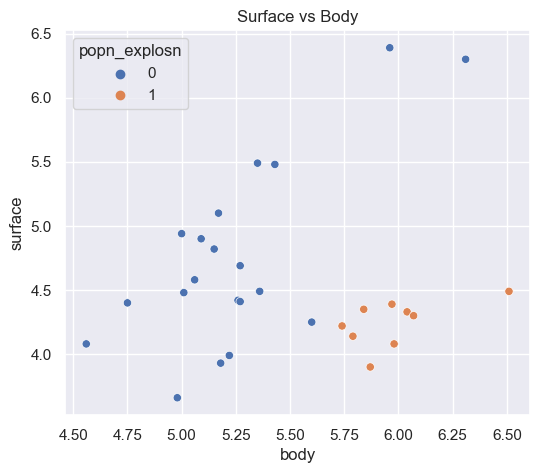

In [15]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=data, x='body', y='surface', hue='popn_explosn')
plt.title("Surface vs Body")
plt.show()

In [16]:
X = data.drop('popn_explosn', axis=1)
y = data[['popn_explosn']]
print(X.head())
print(y.head())

   body  surface
0  5.60     4.25
1  5.18     3.93
2  6.31     6.30
3  5.36     4.49
4  5.96     6.39
   popn_explosn
0             0
1             0
2             0
3             0
4             0


In [17]:
glm = LogisticRegression(penalty=None, max_iter=200)

glm.fit(X, y)

LogisticRegression(max_iter=200, penalty=None)

In [18]:
glm.coef_, glm.intercept_

(array([[ 146.40894937, -151.81204304]]), array([-184.8930899]))

##### Laboratorium 5

### Zadanie 1
-----
Wczytaj dane `pima.csv`.

a) Podziel dane za część treningową i testową (3:2).

b) Dopasuj model drzewa do danych treningowych.

c) Dopasuj model regresji logistycznej do danych treningowych.

d) Podaj miary: czułość, precyzja, AUC dla obu modeli na zbiorze testowym.

e) Narysuj krzywą ROC dla obu modeli na zbiorze testowym.

In [19]:
df = pd.read_csv('pima.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
X = df.drop('Outcome', axis=1)
y = df[['Outcome']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

In [21]:
glm = LogisticRegression(penalty=None, max_iter=200)
tree = DecisionTreeClassifier(max_depth=5, random_state=123)

In [22]:
glm.fit(X_train, y_train)

LogisticRegression(max_iter=200, penalty=None)

In [23]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

In [24]:
print(classification_report(y_test, glm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.88      0.83       192
           1       0.75      0.63      0.69       116

    accuracy                           0.78       308
   macro avg       0.77      0.75      0.76       308
weighted avg       0.78      0.78      0.78       308



In [25]:
print(classification_report(y_test, tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       192
           1       0.68      0.70      0.69       116

    accuracy                           0.76       308
   macro avg       0.74      0.75      0.75       308
weighted avg       0.76      0.76      0.76       308



In [26]:
fpr1, tpr1, _ = roc_curve(y_test, glm.predict_proba(X_test)[:, 1])
fpr2, tpr2, _ = roc_curve(y_test, tree.predict_proba(X_test)[:, 1])

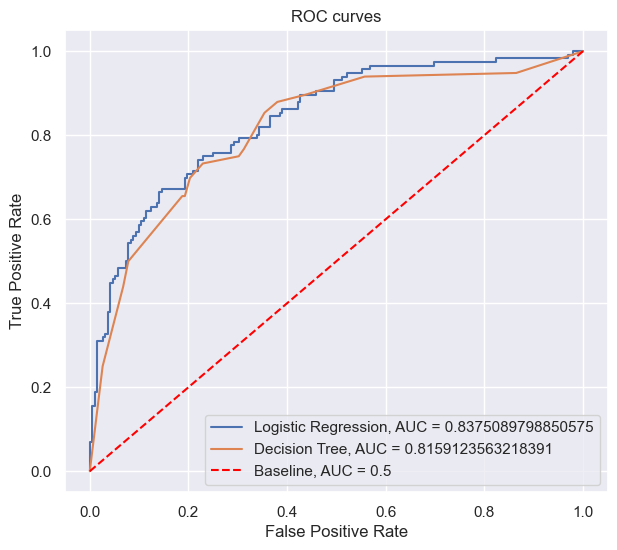

In [33]:
plt.figure(figsize=(7, 6))
plt.plot(fpr1, tpr1, label='Logistic Regression, AUC = ' + str(roc_auc_score(y_test, glm.predict_proba(X_test)[:, 1])))
plt.plot(fpr2, tpr2, label='Decision Tree, AUC = ' + str(roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1])))
plt.plot([0, 1], [0, 1], 'k--', color='red', label='Baseline, AUC = 0.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend()

### Zadanie 2
-----
Eksperyment symulacyjny. Wygenerujmy dane w następujący sposób. Niech $n = 200$, $p = 5$. Wektor $\beta_0 = 1$, $\beta_1 = [2, 1, 0.5, 0.01, 0]$, $x_i \sim N_p(0, I)$ dla $i = 1,2, \dots, n$. $y_i$ pochodzi z rozkładu $Bern(p_i)$, gdzie $p_i=\frac{exp(\beta_0 + x_{i\cdot}\beta_1)}{1 + exp(\beta_0 + x_{i\cdot}\beta_1)}$.

a) Dopasuj model regresji logistycznej. Porównaj prawdziwe wartości wektora $\beta$ z wyestymowanymi.

b) Dopasuj model regresji logistycznej z regularyzacją $L2$ i współczynnikami $C = (10, 5, 2, 1, 0.5, 0.1, 0.01, 0.005)$. jak zmienieją się współczynniki wraz ze wzrostem współczynnika lambda?

c) Dopasuj model regresji logistycznej z regularyzacją $L1$ i współczynnikami $C = (10, 5, 2, 1, 0.5, 0.1, 0.01, 0.005)$. jak zmienieją się współczynniki wraz ze wzrostem współczynnika lambda?

d) Powtórz eksperyment 500 razy dla modelu logistycznego bez regularyzacji, z regularyzacją $L2$ i parametrem $C=1$ i regularyzacją $L1$ i parametrem $C=1$. Oblicz MSE.

In [34]:
n = 200
p = 5
beta_0 = 1
beta_1 = np.array([2, 1, 0.5, 0.01, 0])

In [35]:
X = np.random.normal(0, 1, size=(n, p))
Xbeta = X@beta_1 + beta_0

probs = np.exp(Xbeta) / (1 + np.exp(Xbeta))

y = np.random.binomial(1, probs)

In [36]:
glm = LogisticRegression(penalty=None, max_iter=200)
glm.fit(X, y)

LogisticRegression(max_iter=200, penalty=None)

In [37]:
glm.coef_, glm.intercept_

(array([[ 1.83832709,  1.20120441,  0.08827858, -0.53105161,  0.04210849]]),
 array([1.1723766]))

In [41]:
C = [10, 5, 2, 1, 0.5, 0.1, 0.01, 0.005]

results = []

for c in C:
    model = LogisticRegression(penalty='l2', C=c)
    model.fit(X, y)
        
    
    

results

[{'C': 10,
  'coef': array([[ 1.81869473,  1.18812565,  0.08680248, -0.52367481,  0.04153281]]),
  'intercept': array([1.16308919]),
  'accuracy': 0.825},
 {'C': 5,
  'coef': array([[ 1.79983371,  1.17557305,  0.08539633, -0.51662478,  0.04098219]]),
  'intercept': array([1.15420836]),
  'accuracy': 0.825},
 {'C': 2,
  'coef': array([[ 1.74733564,  1.14069821,  0.08154438, -0.49719291,  0.03946266]]),
  'intercept': array([1.12970866]),
  'accuracy': 0.82},
 {'C': 1,
  'coef': array([[ 1.67095202,  1.09012502,  0.0761091 , -0.46942943,  0.03728454]]),
  'intercept': array([1.09465828]),
  'accuracy': 0.82},
 {'C': 0.5,
  'coef': array([[ 1.54761303,  1.00887344,  0.06778179, -0.42589687,  0.03383913]]),
  'intercept': array([1.03963454]),
  'accuracy': 0.825},
 {'C': 0.1,
  'coef': array([[ 1.06892822,  0.69759253,  0.04095495, -0.27243576,  0.02140358]]),
  'intercept': array([0.84740131]),
  'accuracy': 0.8},
 {'C': 0.01,
  'coef': array([[ 0.32737602,  0.21585158,  0.01274603, -0.07